# kNN for 2D Classification and 2D Regression

In [1]:
import numpy as np
from matplotlib import cm
from scipy.stats import mode
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.datasets import make_classification

## Create k-Nearest Neighbor class

In [2]:
class KNearestNeigh:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        
    def knn_classify(self, xq, metric='sqeuclidean', k=2):
        if len(xq.shape) == 1:
            xq = xq.reshape(1,-1)
            
        dist_matrix = pairwise_distances(xq, self.X, 
                                         metric=metric)
        
        get_neighs = lambda x: self.y[x <= x[np.argsort(x)[k-1]]]
        y_neighs = np.apply_along_axis(get_neighs, axis=1, 
                                       arr=dist_matrix)
        return mode(y_neighs, axis=1, keepdims=True)[0]
    
    def knn_regress(self, xq, metric='sqeuclidean', k=2):
        if len(xq.shape) == 1:
            xq = xq.reshape(1,-1)
            
        dist_matrix = pairwise_distances(xq, self.X, 
                                         metric=metric)
        
        get_neighs = lambda x: self.y[x <= x[np.argsort(x)[k-1]]]
        y_neighs = np.apply_along_axis(get_neighs, axis=1, 
                                       arr=dist_matrix)
        return np.mean(y_neighs, axis=1)

## Generate a random multi-class 2D classification data set

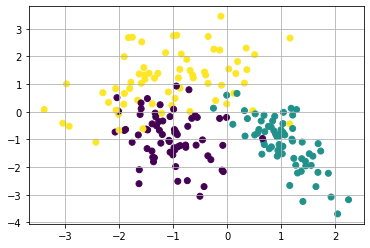

In [3]:
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, 
                           n_clusters_per_class=1, n_classes=3, random_state=5)
plt.scatter(X[:,0], X[:,1], c=y)
plt.grid()
plt.show()

## Perform kNN classification and compare with sklearn kNN

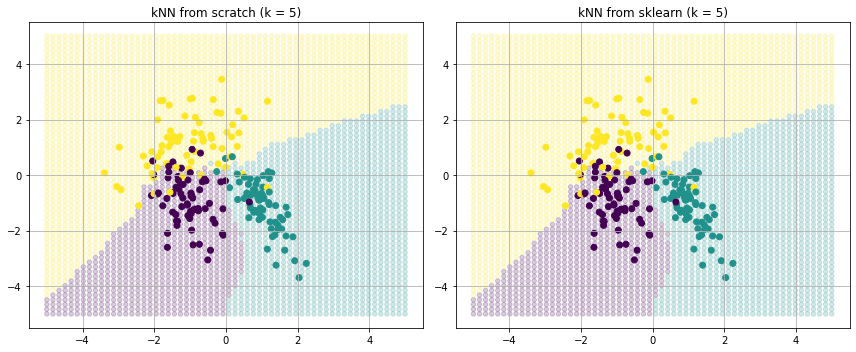

In [4]:
NNG = KNearestNeigh(X, y)

x1, x2 = np.meshgrid(np.linspace(-5,5,60), 
                     np.linspace(-5,5,60))
xfine = np.hstack((x1.reshape(-1,1), x2.reshape(-1,1)))
y_pred = NNG.knn_classify(xfine, k=5)

# Plot the decision boundaries
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
ax1.scatter(xfine[:,0], xfine[:,1], c=y_pred, 
            s=20, alpha=0.2)
ax1.scatter(X[:,0], X[:,1], c=y)
ax1.set_title('kNN from scratch (k = 5)')
ax1.grid()


from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors=5).fit(X, y)
y_pred2 = knn.predict(xfine)

# Plot the decision boundaries
ax2.scatter(xfine[:,0], xfine[:,1], c=y_pred2, 
            s=20, alpha=0.2)
ax2.scatter(X[:,0], X[:,1], c=y)
ax2.set_title('kNN from sklearn (k = 5)')
ax2.grid()

plt.tight_layout()
plt.show()

## Generate a random 2D regression data set

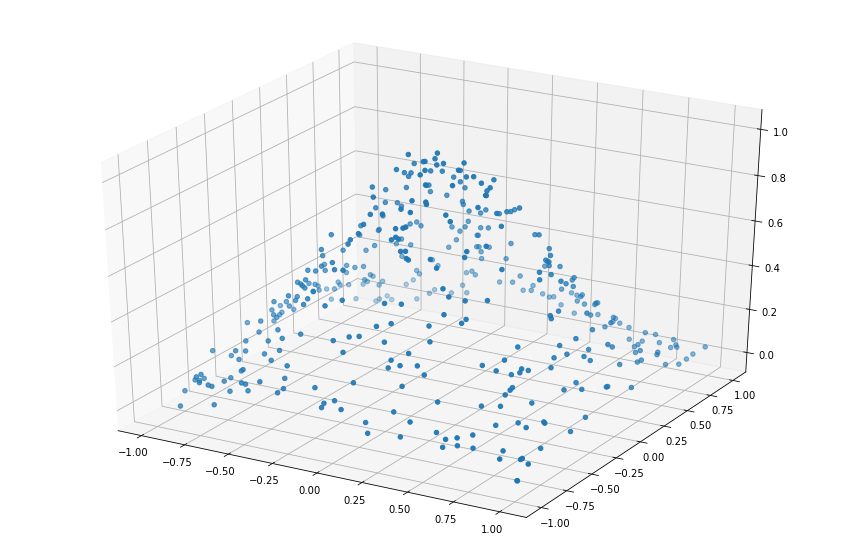

In [5]:
np.random.seed(100)

N = 400
X = 2 * (np.random.rand(N,2) - 0.5)
y = np.exp(-2 * (X[:,0] ** 2 + X[:,1] ** 2)) + 0.1 * (np.random.rand(N) - 0.5)

fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:,1], y)
plt.show()

## Perform kNN regression from scratch

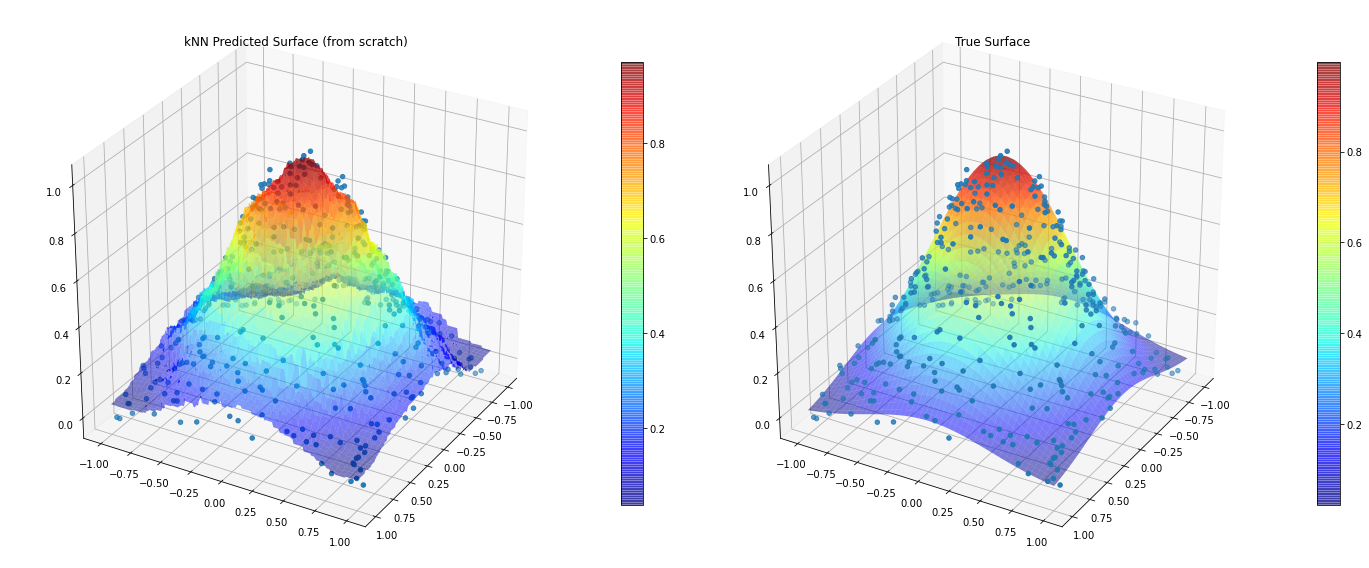

In [6]:
NNG = KNearestNeigh(X, y)

x1, x2 = np.meshgrid(np.linspace(-1,1,200),np.linspace(-1,1,200))
xfine = np.hstack((x1.reshape(-1,1), x2.reshape(-1,1)))
y_pred = NNG.knn_regress(xfine, k=10)
y_true = np.exp(-2 * (x1 ** 2 + x2 ** 2))

fig = plt.figure(figsize=(20, 8))

# Plot the predicted surface
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter3D(X[:,0], X[:,1], y)
surf1 = ax.plot_surface(x1, x2, y_pred.reshape(x1.shape),
                        linewidth=0, cmap=cm.jet, alpha=0.5)
fig.colorbar(surf1, shrink=0.8)
ax.view_init(elev=30, azim=30)
ax.set_title('kNN Predicted Surface (from scratch)')

# Plot the true surface
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(X[:,0], X[:,1], y)
surf2 = ax.plot_surface(x1, x2, y_true, linewidth=0,
                        cmap=cm.jet, alpha=0.5)
fig.colorbar(surf2, shrink=0.8)
ax.view_init(elev=30, azim=30)
ax.set_title('True Surface')
plt.tight_layout()
plt.show()

## Perform kNN regression from sklearn

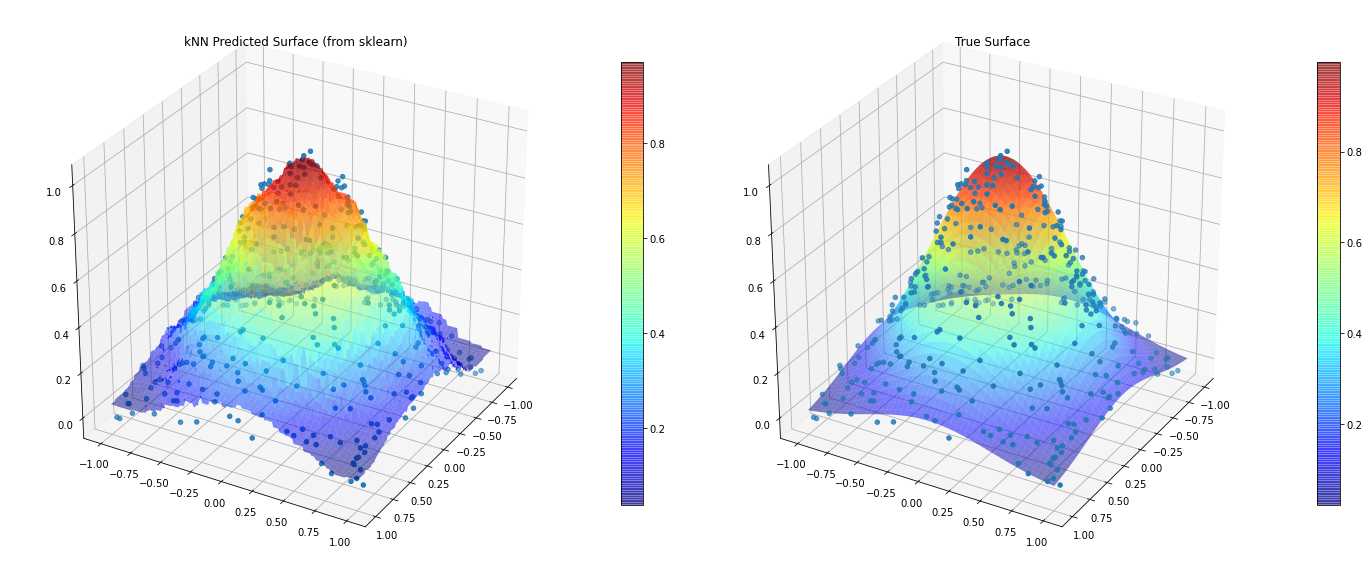

In [7]:
from sklearn.neighbors import KNeighborsRegressor 

knn = KNeighborsRegressor(n_neighbors=10).fit(X, y)
y_pred2 = knn.predict(xfine)

fig = plt.figure(figsize=(20, 8))

# Plot the predicted surface
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter3D(X[:,0], X[:,1], y)
surf1 = ax.plot_surface(x1, x2, y_pred2.reshape(x1.shape),
                        linewidth=0, cmap=cm.jet, alpha=0.5)
fig.colorbar(surf1, shrink=0.8)
ax.view_init(elev=30, azim=30)
ax.set_title('kNN Predicted Surface (from sklearn)')

# Plot the true surface
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(X[:,0], X[:,1], y)
surf2 = ax.plot_surface(x1, x2, y_true, linewidth=0,
                        cmap=cm.jet, alpha=0.5)
fig.colorbar(surf2, shrink=0.8)
ax.view_init(elev=30, azim=30)
ax.set_title('True Surface')
plt.tight_layout()
plt.show()